<a href="https://colab.research.google.com/github/Aaksshay03/AKSHU/blob/main/Aaksshay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [ ]:
# Let's first load and inspect the file to understand its structure and the actual column names
import pandas as pd

# Load the dataset using the provided path
file_path = '/content/Data Set 1.csv'
df_initial = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display the first few rows and the column names to understand the data structure
df_initial.head(), df_initial.columns


(   id  age  gender  income  spending_score  membership_years  \
 0   1   38  Female   99342              90                 3   
 1   2   21  Female   78852              60                 2   
 2   3   60  Female  126573              30                 2   
 3   4   40   Other   47099              74                 9   
 4   5   65  Female  140621              21                 3   
 
    purchase_frequency preferred_category  last_purchase_amount  
 0                  24          Groceries                113.53  
 1                  42             Sports                 41.93  
 2                  28           Clothing                424.36  
 3                   5      Home & Garden                991.93  
 4                  25        Electronics                347.08  ,
 Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
        'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
       dtype='object'))

In [ ]:
# Load the dataset
df_initial = pd.read_csv('..//content/Data Set 1.csv', encoding="ISO-8859-1",
                         dtype={'id': str})

print('Dataframe dimensions:', df_initial.shape)

# Assuming the date column is 'membership_years' and referring to it as 'PurchaseDate' for context
df_initial['PurchaseDate'] = pd.to_datetime(df_initial['membership_years'], errors='coerce')

# Information about columns, null values, and their percentages
tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0: 'column type'})
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0: 'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum() / df_initial.shape[0] * 100).T
                           .rename(index={0: 'null values (%)'}))

display(tab_info)

# Show first few rows
display(df_initial.head())


Dataframe dimensions: (1000, 9)


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
import pandas as pd

# Load the dataset
df_initial = pd.read_csv('..//content/Data Set 1.csv', encoding="ISO-8859-1",
                         dtype={'id': str})

print('Dataframe dimensions:', df_initial.shape)

# Assuming the date column is 'membership_years' and referring to it as 'PurchaseDate' for context
df_initial['PurchaseDate'] = pd.to_datetime(df_initial['membership_years'], errors='coerce')

# Information about columns, null values, and their percentages
tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0: 'column type'})
# Use pd.concat instead of append
tab_info = pd.concat([tab_info, pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0: 'null values (nb)'})])
tab_info = pd.concat([tab_info, pd.DataFrame(df_initial.isnull().sum() / df_initial.shape[0] * 100).T
                           .rename(index={0: 'null values (%)'})])

display(tab_info)

# Show first few rows
display(df_initial.head())

Dataframe dimensions: (1000, 9)


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,PurchaseDate
column type,object,int64,object,int64,int64,int64,int64,object,float64,datetime64[ns]
null values (nb),0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,PurchaseDate
0,1,38,Female,99342,90,3,24,Groceries,113.53,1970-01-01 00:00:00.000000003
1,2,21,Female,78852,60,2,42,Sports,41.93,1970-01-01 00:00:00.000000002
2,3,60,Female,126573,30,2,28,Clothing,424.36,1970-01-01 00:00:00.000000002
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,1970-01-01 00:00:00.000000009
4,5,65,Female,140621,21,3,25,Electronics,347.08,1970-01-01 00:00:00.000000003


In [ ]:
# Let's load the second file 'customer_segmentation_data.csv' to understand its structure.
file_path_2 = '/content/customer_segmentation_data.csv'
df_customer_segmentation = pd.read_csv(file_path_2, encoding="ISO-8859-1")

# Display the first few rows and the column names to understand the data structure
df_customer_segmentation.head(), df_customer_segmentation.columns


(   id  age  gender  income  spending_score  membership_years  \
 0   1   38  Female   99342              90                 3   
 1   2   21  Female   78852              60                 2   
 2   3   60  Female  126573              30                 2   
 3   4   40   Other   47099              74                 9   
 4   5   65  Female  140621              21                 3   
 
    purchase_frequency preferred_category  last_purchase_amount  
 0                  24          Groceries                113.53  
 1                  42             Sports                 41.93  
 2                  28           Clothing                424.36  
 3                   5      Home & Garden                991.93  
 4                  25        Electronics                347.08  ,
 Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
        'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
       dtype='object'))

In [ ]:
# Check for missing values in each column
missing_values = df_initial.isnull().sum()

# Display the columns with missing values
print(missing_values[missing_values > 0])

# Handling missing values:
# If there are a few missing values, you can either remove them:
df_initial.dropna(inplace=True)

# OR, you can impute the missing values (e.g., using the median or mode for numeric or categorical columns):

Series([], dtype: int64)


In [ ]:
# Check for duplicate rows
duplicate_rows = df_initial[df_initial.duplicated()]

# Display any duplicates found
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows if found
df_initial.drop_duplicates(inplace=True)


Duplicate Rows:
Empty DataFrame
Columns: [id, age, gender, income, spending_score, membership_years, purchase_frequency, preferred_category, last_purchase_amount, PurchaseDate]
Index: []


In [ ]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in a specific numeric column (e.g., 'income')
outliers = detect_outliers(df_initial, 'income')
print("Outliers in 'income':")
print(outliers)


Outliers in 'income':
Empty DataFrame
Columns: [id, age, gender, income, spending_score, membership_years, purchase_frequency, preferred_category, last_purchase_amount, PurchaseDate]
Index: []


In [ ]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return bounds in addition to outliers
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)], lower_bound, upper_bound

# Detect outliers in a specific numeric column (e.g., 'income')
outliers, lower_bound, upper_bound = detect_outliers(df_initial, 'income') # Get lower and upper bounds
print("Outliers in 'income':")
print(outliers)

# Remove outliers
df_initial = df_initial[~df_initial.index.isin(outliers.index)]

# OR handle outliers (e.g., cap them to upper and lower bounds)
df_initial['income'] = np.where(df_initial['income'] > upper_bound, upper_bound, df_initial['income'])
df_initial['income'] = np.where(df_initial['income'] < lower_bound, lower_bound, df_initial['income'])

Outliers in 'income':
Empty DataFrame
Columns: [id, age, gender, income, spending_score, membership_years, purchase_frequency, preferred_category, last_purchase_amount, PurchaseDate]
Index: []


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding 'gender' column using LabelEncoder
label_encoder = LabelEncoder()
df_initial['gender_encoded'] = label_encoder.fit_transform(df_initial['gender'])

# Check the result
print(df_initial[['gender', 'gender_encoded']].head())


   gender  gender_encoded
0  Female               0
1  Female               0
2  Female               0
3   Other               2
4  Female               0


In [ ]:
# Example: One-hot encoding 'preferred_category'
df_initial = pd.get_dummies(df_initial, columns=['preferred_category'], drop_first=True)

# Check the result
df_initial.head()


,id,age,gender,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,PurchaseDate,gender_encoded,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,1,38,Female,99342.0,90,3,24,113.53,1970-01-01 00:00:00.000000003,0,False,True,False,False
1,2,21,Female,78852.0,60,2,42,41.93,1970-01-01 00:00:00.000000002,0,False,False,False,True
2,3,60,Female,126573.0,30,2,28,424.36,1970-01-01 00:00:00.000000002,0,False,False,False,False
3,4,40,Other,47099.0,74,9,5,991.93,1970-01-01 00:00:00.000000009,2,False,False,True,False
4,5,65,Female,140621.0,21,3,25,347.08,1970-01-01 00:00:00.000000003,0,True,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
num_cols = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df_initial[num_cols] = scaler.fit_transform(df_initial[num_cols])

# Check the result
df_initial.head()


,id,age,gender,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,PurchaseDate,gender_encoded,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,1,-0.384644,Female,0.316868,1.358468,-0.865010,-0.182348,-1.281540,1970-01-01 00:00:00.000000003,0,False,True,False,False
1,2,-1.515362,Female,-0.282016,0.321865,-1.215358,1.082005,-1.523763,1970-01-01 00:00:00.000000002,0,False,False,False,True
2,3,1.078639,Female,1.112778,-0.714738,-1.215358,0.098620,-0.230005,1970-01-01 00:00:00.000000002,0,False,False,False,False
3,4,-0.251618,Other,-1.210096,0.805613,1.237080,-1.516943,1.690080,1970-01-01 00:00:00.000000009,2,False,False,True,False
4,5,1.411203,Female,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,1970-01-01 00:00:00.000000003,0,True,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
df_initial[num_cols] = min_max_scaler.fit_transform(df_initial[num_cols])

# Check the result
df_initial.head()


,id,age,gender,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,PurchaseDate,gender_encoded,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,1,0.392157,Female,0.577966,0.898990,0.222222,0.469388,0.104241,1970-01-01 00:00:00.000000003,0,False,True,False,False
1,2,0.058824,Female,0.407172,0.595960,0.111111,0.836735,0.031870,1970-01-01 00:00:00.000000002,0,False,False,False,True
2,3,0.823529,Female,0.804950,0.292929,0.111111,0.551020,0.418420,1970-01-01 00:00:00.000000002,0,False,False,False,False
3,4,0.431373,Other,0.142495,0.737374,0.888889,0.081633,0.992106,1970-01-01 00:00:00.000000009,2,False,False,True,False
4,5,0.921569,Female,0.922047,0.202020,0.222222,0.489796,0.340308,1970-01-01 00:00:00.000000003,0,True,False,False,False


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns




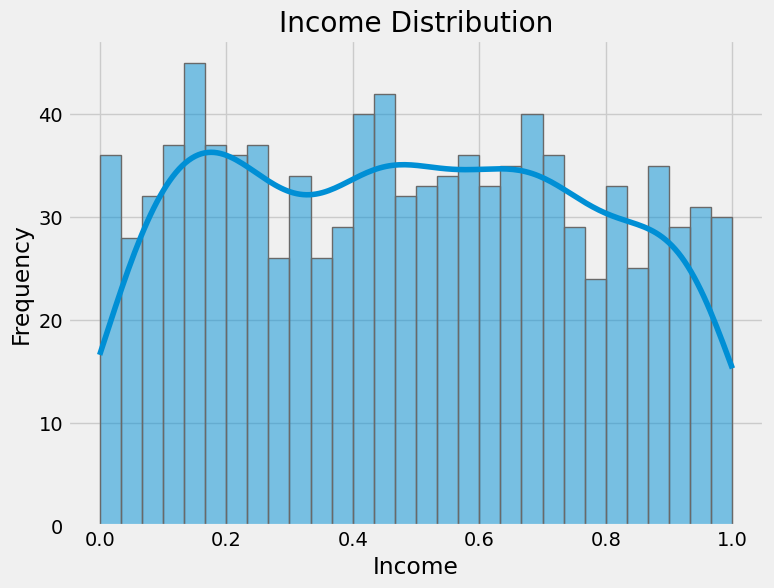

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df_initial['income'], kde=True, bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


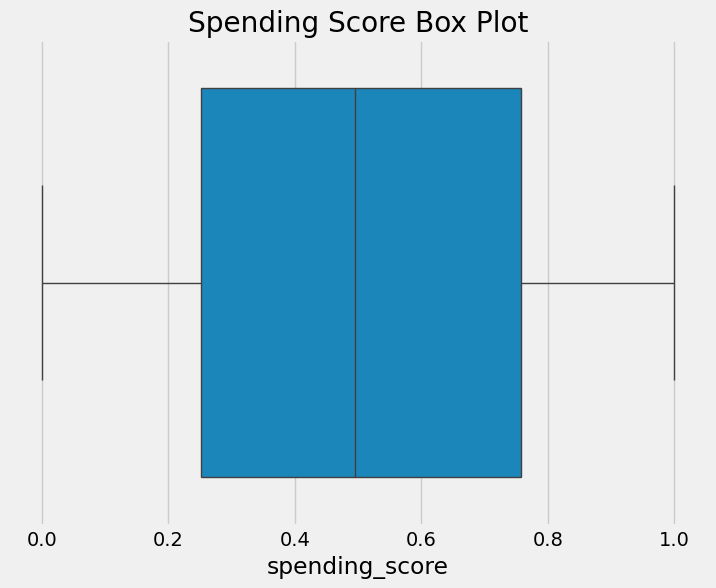

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_initial['spending_score'])
plt.title('Spending Score Box Plot')
plt.show()


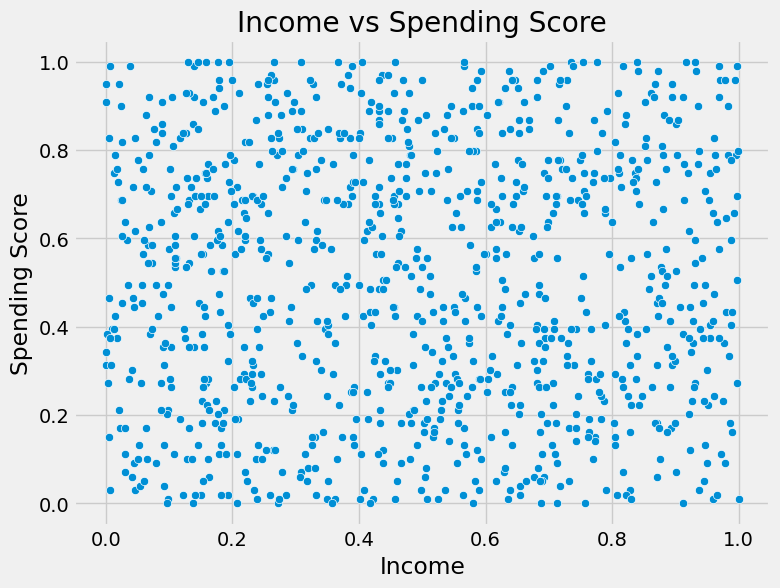

In [ ]:
# Scatter plot for 'income' vs 'spending_score'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='spending_score', data=df_initial)
plt.title('Income vs Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()


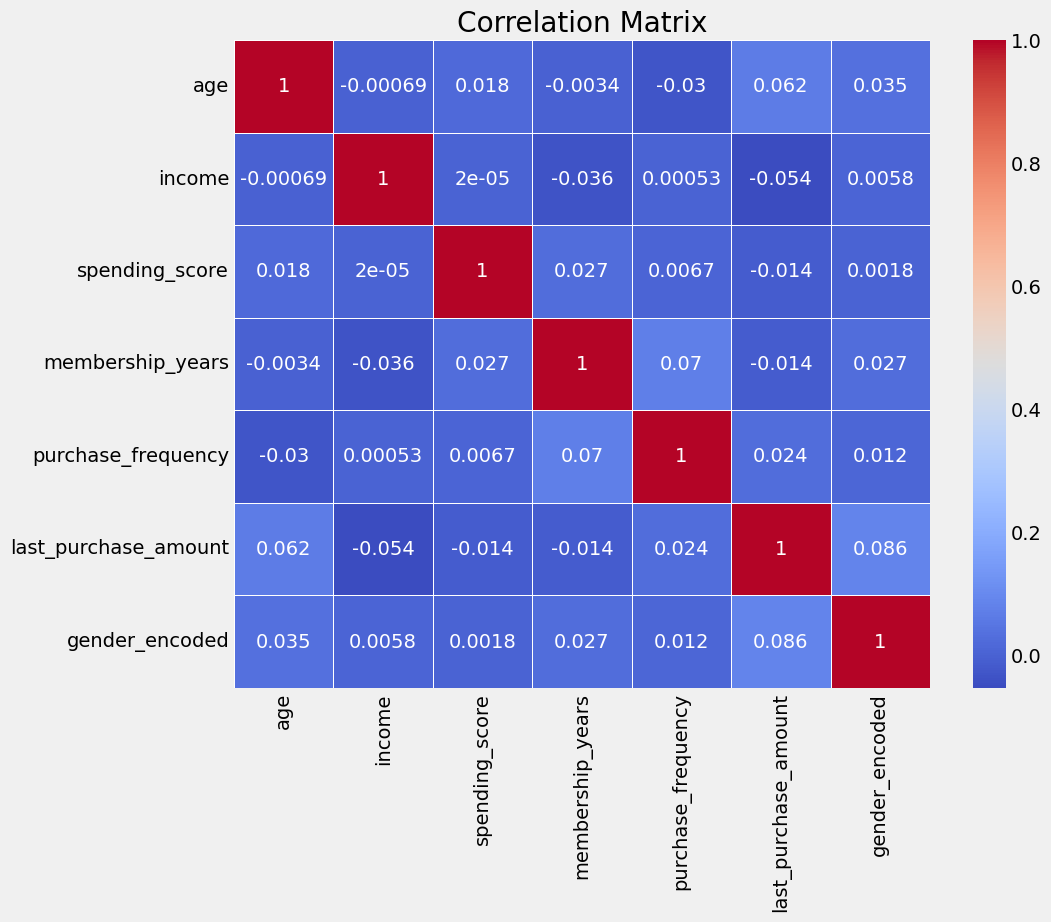

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
# Include only numerical features for correlation calculation
numerical_features = df_initial.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Select only the numerical columns
numeric_columns = df_initial.select_dtypes(include='number')

# Calculate the median for the numerical columns
median_values = numeric_columns.median()

print("Median Values:\n", median_values)


Median Values:
 age                     0.529412
income                  0.482137
spending_score          0.494949
membership_years        0.444444
purchase_frequency      0.530612
last_purchase_amount    0.486380
gender_encoded          1.000000
dtype: float64


In [ ]:
# 1. Summary statistics for numerical columns (mean, min, max, std, etc.)
summary_stats = df_initial.describe()  # Automatically applies to numerical columns only
print("Summary Statistics:\n", summary_stats)

# 2. Median for numerical columns only
numeric_columns = df_initial.select_dtypes(include='number')
median_values = numeric_columns.median()
print("Median Values:\n", median_values)

# 3. Mode for all columns (handles both numerical and categorical)
mode_values = df_initial.mode().iloc[0]  # .iloc[0] takes the first mode if there are multiple
print("Mode Values:\n", mode_values)


Summary Statistics:
                age       income  spending_score  membership_years  \
count  1000.000000  1000.000000     1000.000000       1000.000000   
mean      0.505549     0.487599        0.501869          0.496556   
min       0.000000     0.000000        0.000000          0.000000   
25%       0.235294     0.232625        0.252525          0.222222   
50%       0.529412     0.482137        0.494949          0.444444   
75%       0.764706     0.717737        0.757576          0.777778   
max       1.000000     1.000000        1.000000          1.000000   
std       0.294945     0.285330        0.292477          0.317303   

       purchase_frequency  last_purchase_amount  \
count         1000.000000           1000.000000   
mean             0.522367              0.487142   
min              0.000000              0.000000   
25%              0.285714              0.210608   
50%              0.530612              0.486380   
75%              0.775510              0.744709   


In [ ]:



# Assuming columns: 'last_purchase_amount', 'purchase_frequency', and 'membership_years'

# Create Average Purchase Value: Total purchase amount / purchase frequency
df_initial['avg_purchase_value'] = df_initial['last_purchase_amount'] / df_initial['purchase_frequency']

# Customer Lifespan in years (assuming 'membership_years' represents the duration as a customer)
df_initial['customer_lifespan'] = df_initial['membership_years']

# Customer Lifetime Value (CLV)
df_initial['CLV'] = df_initial['avg_purchase_value'] * df_initial['purchase_frequency'] * df_initial['customer_lifespan']

# Check the new feature
df_initial[['avg_purchase_value', 'customer_lifespan', 'CLV']].head()


,avg_purchase_value,customer_lifespan,CLV
0,0.222079,0.222222,0.023165
1,0.038088,0.111111,0.003541
2,0.759355,0.111111,0.046491
3,12.153297,0.888889,0.881872
4,0.694795,0.222222,0.075624


In [ ]:
# Assuming the current year is 2024, and 'membership_years' is the number of years as a member
df_initial['recency'] = 2024 - df_initial['membership_years']  # Years since they became a customer

# Check the new 'recency' feature
df_initial[['membership_years', 'recency']].head()



,membership_years,recency
0,0.222222,2023.777778
1,0.111111,2023.888889
2,0.111111,2023.888889
3,0.888889,2023.111111
4,0.222222,2023.777778


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['membership_years'].plot(kind='hist', bins=20, title='membership_years')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['recency'].plot(kind='hist', bins=20, title='recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='membership_years', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='membership_years', y='recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['membership_years']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('membership_years')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['recency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('recency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['membership_years'].plot(kind='line', figsize=(8, 4), title='membership_years')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['recency'].plot(kind='line', figsize=(8, 4), title='recency')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Create a new feature: Spending Score per Purchase
df_initial['spending_score_per_purchase'] = df_initial['spending_score'] / df_initial['purchase_frequency']

# Check the new feature
df_initial[['spending_score', 'purchase_frequency', 'spending_score_per_purchase']].head()


,spending_score,purchase_frequency,spending_score_per_purchase
0,0.898990,0.469388,1.915239
1,0.595960,0.836735,0.712244
2,0.292929,0.551020,0.531612
3,0.737374,0.081633,9.032828
4,0.202020,0.489796,0.412458


from matplotlib import pyplot as plt
_df_11['spending_score'].plot(kind='hist', bins=20, title='spending_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['purchase_frequency'].plot(kind='hist', bins=20, title='purchase_frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['spending_score_per_purchase'].plot(kind='hist', bins=20, title='spending_score_per_purchase')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='spending_score', y='purchase_frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='purchase_frequency', y='spending_score_per_purchase', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['spending_score'].plot(kind='line', figsize=(8, 4), title='spending_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['purchase_frequency'].plot(kind='line', figsize=(8, 4), title='purchase_frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['spending_score_per_purchase'].plot(kind='line', figsize=(8, 4), title='spending_score_per_purchase')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize purchase_frequency and last_purchase_amount
scaler = MinMaxScaler()
df_initial[['purchase_frequency_scaled', 'last_purchase_amount_scaled']] = scaler.fit_transform(
    df_initial[['purchase_frequency', 'last_purchase_amount']])

# Create an engagement score as a combination of purchase frequency and amount spent
df_initial['engagement_level'] = df_initial['purchase_frequency_scaled'] + df_initial['last_purchase_amount_scaled']

# Check the new feature
df_initial[['purchase_frequency_scaled', 'last_purchase_amount_scaled', 'engagement_level']].head()


,purchase_frequency_scaled,last_purchase_amount_scaled,engagement_level
0,0.469388,0.104241,0.573629
1,0.836735,0.031870,0.868604
2,0.551020,0.418420,0.969441
3,0.081633,0.992106,1.073739
4,0.489796,0.340308,0.830104


from matplotlib import pyplot as plt
_df_19['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['purchase_frequency_scaled'].plot(kind='hist', bins=20, title='purchase_frequency_scaled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['last_purchase_amount_scaled'].plot(kind='hist', bins=20, title='last_purchase_amount_scaled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['engagement_level'].plot(kind='hist', bins=20, title='engagement_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='index', y='purchase_frequency_scaled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='purchase_frequency_scaled', y='last_purchase_amount_scaled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='last_purchase_amount_scaled', y='engagement_level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['purchase_frequency_scaled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('purchase_frequency_scaled')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['last_purchase_amount_scaled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('last_purchase_amount_scaled')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['engagement_level']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('engagement_level')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_30['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['purchase_frequency_scaled'].plot(kind='line', figsize=(8, 4), title='purchase_frequency_scaled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['last_purchase_amount_scaled'].plot(kind='line', figsize=(8, 4), title='last_purchase_amount_scaled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['engagement_level'].plot(kind='line', figsize=(8, 4), title='engagement_level')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Create a high-spender flag where 1 indicates the customer is a high spender (above a certain threshold)
high_spender_threshold = df_initial['last_purchase_amount'].quantile(0.75)  # Upper quartile
df_initial['high_spender'] = (df_initial['last_purchase_amount'] > high_spender_threshold).astype(int)

# Check the new feature
df_initial[['last_purchase_amount', 'high_spender']].head()


In [ ]:
# RFM score by normalizing recency, frequency, and monetary value
df_initial['RFM_score'] = (df_initial['recency'] * 0.15) + \
                          (df_initial['purchase_frequency_scaled'] * 0.25) + \
                          (df_initial['last_purchase_amount_scaled'] * 0.60)

# Check the new RFM score
df_initial[['recency', 'purchase_frequency_scaled', 'last_purchase_amount_scaled', 'RFM_score']].head()


,recency,purchase_frequency_scaled,last_purchase_amount_scaled,RFM_score
0,2023.777778,0.469388,0.104241,303.746558
1,2023.888889,0.836735,0.031870,303.811639
2,2023.888889,0.551020,0.418420,303.972141
3,2023.111111,0.081633,0.992106,304.082338
4,2023.777778,0.489796,0.340308,303.893300


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_mall_customers = pd.read_csv('/content/Mall_Customers.csv')  # Update the path as needed

# Select relevant features for clustering
features = df_mall_customers[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert to DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=['Income', 'Spending Score'])


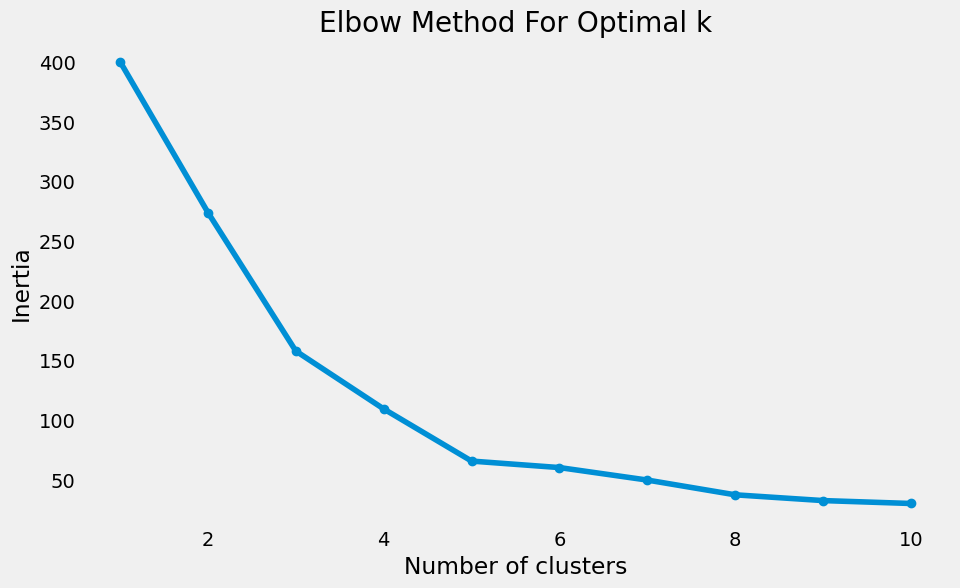

In [ ]:
# Elbow method to determine optimal number of clusters
inertia = []
k_range = range(1, 11)  # Try clusters from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


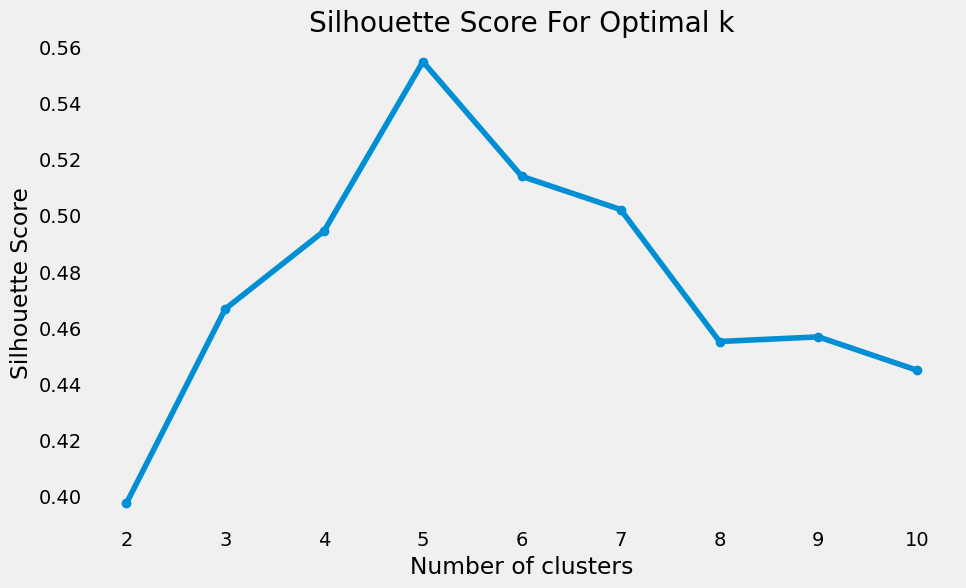

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_range[1:]:  # Start from 2 as silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [ ]:
# Apply K-Means with the chosen number of clusters
optimal_k = 3  # Change this based on your findings from the elbow or silhouette score

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_mall_customers['Cluster'] = kmeans.fit_predict(features_scaled)

# Display the DataFrame with clusters
print(df_mall_customers[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        2
1           2                  15                      81        2
2           3                  16                       6        2
3           4                  16                      77        2
4           5                  17                      40        2


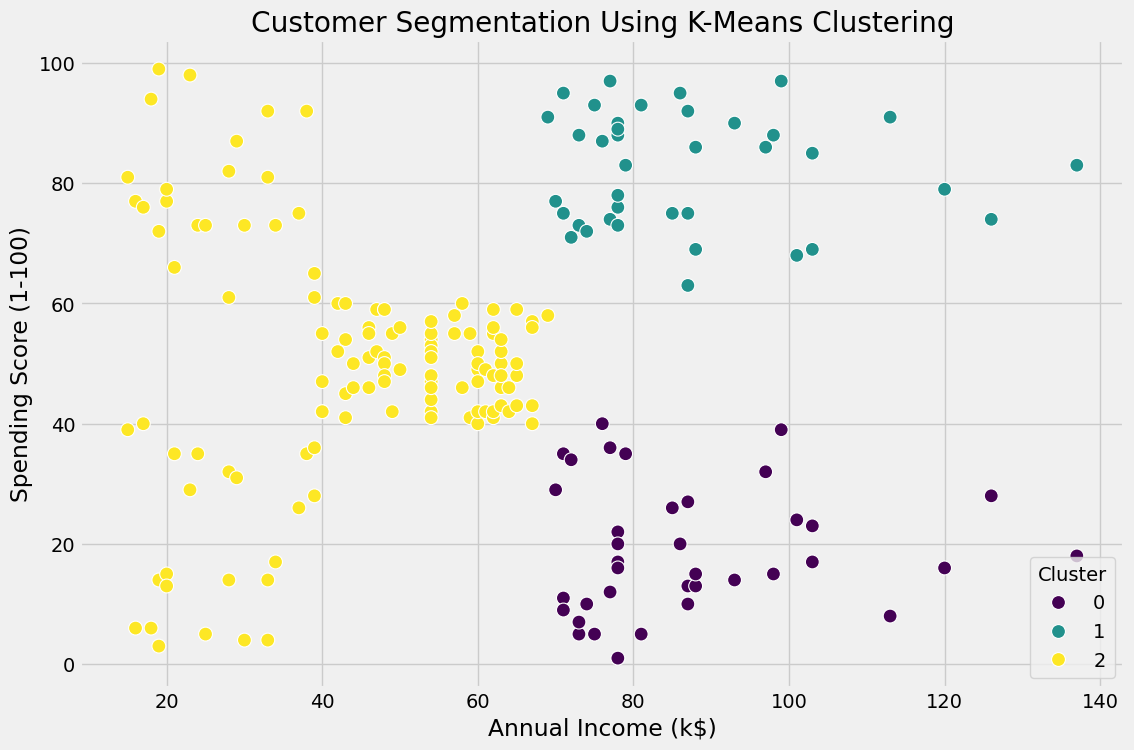

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_mall_customers, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation Using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assume 'Cluster' is the target variable, and we want to predict it based on other features
X = df_mall_customers.drop(columns=['CustomerID', 'Cluster'])  # Features
y = df_mall_customers['Cluster']  # Target variable

# One-hot encoding for categorical features if any
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Building the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 8  0  0]
 [ 0  8  0]
 [ 0  1 23]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.96      0.98        24

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40

Accuracy Score: 0.975


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume we're predicting 'Spending Score' based on features
X = df_mall_customers.drop(columns=['CustomerID', 'Spending Score (1-100)'])  # Features
y = df_mall_customers['Spending Score (1-100)']  # Target variable

# One-hot encoding for categorical features if any
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred = rf_regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 108.29659730902782
R² Score: 0.7804383316255215
